**P_Gaduel_PROJECT**

**1:  Research Objectives**

1.1: Project objectives 

*To quantify the prevalence of political violence events in Africa and Sudan in particular over the past decade*.

*To analyze the trend in the number of fatalities resulting from political violence events in Sudan*.

*To investigate the correlation between the frequency of political violence events and the number of fatalities*.

*To identify the types of political violence that result in the highest number of fatalities*.

*To provide policy recommendations based on the findings to reduce fatalities associated with political violence in Sudan*.

1.2: Hypothesis

Null Hypothesis (H₀)

*"There is no correlation between the frequency of political violence events and the number of fatalities in Sudan."*

Alternative Hypothesis (H₁)

*"There is a positive correlation between the frequency of political violence events and the number of fatalities in Sudan."*


1.3: Data Collection

*Data on political violence events and fatalities was collected from https://acleddata.com/curated-data-files/#regional*

Data Analysis

*Data will be analysed using statistical methods to to investigate the correlation coefficients and strong linear relationship using regression analysis.The results will be tested using statsmodels and scikitlearn.*

*Interpretation: Determine if the results support the hypothesis and assess the strength and significance of the correlation.*


1.4: Description of the ACLED Data Columns at a Glance

  
**Column name	Column description	Values**

**event_id_cnty**:	A unique alphanumeric event identifier by number and country acronym. This identifier remains constant even when the event details are updated.	E.g. ETH9766

**event_date**:	The date on which the event took place. Recorded as Year-Month-Day. 	E.g. 2023-02-16
year	The year in which the event took place.	E.g. 2018

**time_precision**:	A numeric code between 1 and 3 indicating the level of precision of the date recorded for the event. The higher the number, the lower the precision.	1, 2, or 3; with 1 being the most precise.

**disorder_type** 	The disorder category an event belongs to.	Political violence, Demonstrations, or Strategic developments.

**event_type**	The type of event; further specifies the nature of the event.	E.g. Battles For the full list of ACLED event types, see the ACLED Event Types table.

**sub_event_type**:	A subcategory of the event type.	E.g. Armed clash 

**actor1**:	One of two main actors involved in the event (does not necessarily indicate the aggressor).	E.g. Rioters (Papua New Guinea)

**assoc_actor_1**:	Actor(s) involved in the event alongside ‘Actor 1’ or actor designations that further identify ‘Actor 1’.	E.g. Labor Group (Spain); Women (Spain)


**inter1**:	A text value indicating the type of ‘Actor 1’ (for more, see the section Actor Names, Types, and ‘Inter’ Codes).	E.g. Rebel group

**actor2**:	One of two main actors involved in the event (does not necessarily indicate the target or victim).	E.g. Civilians (Kenya)

**assoc_actor_2**: Actor(s) involved in the event alongside ‘Actor 2’ or actor designation further identifying ‘Actor 2’. 	E.g. Labor Group (Spain); Women (Spain)


**inter2**:	A text value indicating the type of ‘Actor 2’ (for more, see the section Actor Names, Types, and ‘Inter’ Codes).	E.g. State forces

**interaction**:	A text value based on a combination of ‘Inter 1’ and ‘Inter 2’ indicating the two actor types interacting in the event (for more, see the section Actor Names, Types, and ‘Inter’ Codes).	E.g. Rebel group – Civilians

**civilian_targeting**:	This column indicates whether the event involved civilian targeting. 	Either ‘Civilians targeted’ or blank.

**iso**:	A unique three-digit numeric code assigned to each country or territory according to ISO 3166.	E.g. 231 for Ethiopia

**region**:	The region of the world where the event took place.	E.g. Eastern Africa

**country**: 	The country or territory in which the event took place.	E.g. Ethiopia

**admin1**:	The largest sub-national administrative region in which the event took place.	E.g. Oromia

**admin2**:	The second largest sub-national administrative region in which the event took place.	E.g. Arsi

**admin3**:	The third largest sub-national administrative region in which the event took place.	E.g. Merti

**location**:	The name of the location at which the event took place.	E.g. Abomsa

**latitude**:	The latitude of the location in four decimal degrees notation (EPSG:4326).	E.g. 8.5907

**longitude**:	The longitude of the location in four decimal degrees notation (EPSG:4326).	E.g. 39.8588

**geo_precision**:	A numeric code between 1 and 3 indicating the level of certainty of the location recorded for the event. The higher the number, the lower the precision.	1, 2, or 3; with 1 being the most precise.

**source**:	The sources used to record the event. Separated by a semicolon.	E.g. Ansar Allah; Yemen Data Project

**source_ scale**:	An indication of the geographic closeness of the used sources to the event (for more, see the section Source Scale).	E.g. Local partner-National

**notes**	A short description of the event.	E.g. On 16 February 2023, OLF-Shane abducted an unidentified number of civilians after stopping a vehicle in an area near Abomsa (Merti, Arsi, Oromia). The abductees were traveling from Adama to Abomsa, Arsi.
fatalities	The number of reported fatalities arising from an event. When there are conflicting reports, the most conservative estimate is recorded.	E.g. 3. No information on fatalities is recorded as 0 reported fatalities.

**tags**	Additional structured information about the event. Separated by a semicolon.	E.g. women targeted: politicians; sexual violence

**timestamp**	An automatically generated Unix timestamp that represents the exact date and time an event was uploaded to the ACLED API.	E.g. 1676909320


**2: Importing the neccessary python libraries and loading the data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv(r'C:\Users\pgaduel\Desktop\Gaduel_Phase3_Project\Sudan_1997-2024_Dec06.csv')
print(df.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')


**3: Data inspection, cleaning and preprocessing**

In [2]:
#Inspecting the dataset

print("Shape of the data:", df.shape)
Rows,Cols=df.shape
df.head()

Shape of the data: (35057, 31)


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,SUD31794,12/6/2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Sudan (2019-),NaN,State forces,...,El Fasher,13.6264,25.3559,1,Twitter; WikiLeaks - El Fasher 'Darfur News',New media,"On 6 December 2024, SAF airstrikes targeted RS...",0,NaN,1733789073
1,SUD31815,12/6/2024,2024,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Sudan),NaN,Protesters,...,Malha,15.0934,26.1591,1,Darfur 24; WikiLeaks - El Fasher 'Darfur News',New media-Subnational,"On 6 December 2024, residents staged a protest...",1,crowd size=no report,1733789073
2,SUD31831,12/6/2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),NaN,State forces,...,Khartoum North - Shambat,15.6594,32.5300,1,Alhamish Voice; Beam reports; Emergency Lawyer...,New media-National,"On 6 December 2024, SAF airstrikes targeted a ...",5,NaN,1733789073
3,SUD31839,12/6/2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Sudan),NaN,Protesters,...,Sunta,11.0432,25.6139,1,Darfur 24,Subnational,"On 6 December 2024, residents staged a protest...",0,crowd size=no report,1733789073
4,SUD31842,12/6/2024,2024,2,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Sudan (2019-),NaN,State forces,...,Al Sharif Wad El Obeid,14.4121,33.7298,1,Twitter,New media,Movement of forces: Around 6 December 2024 (as...,0,NaN,1733789073


(52472, 32)


In [ ]:
#Group by 'location' (or any other region-related column)
grouped = df.groupby('country').sum()

#print(grouped)
grouped

In [4]:
#Check missing values from the grouped data
grouped.isnull().sum().sort_values(ascending=False).head(31)

event_id_cnty         0
event_date            0
tags                  0
fatalities            0
notes                 0
source_scale          0
source                0
geo_precision         0
longitude             0
latitude              0
location              0
admin3                0
admin2                0
admin1                0
region                0
iso                   0
civilian_targeting    0
interaction           0
inter2                0
assoc_actor_2         0
actor2                0
inter1                0
assoc_actor_1         0
actor1                0
sub_event_type        0
event_type            0
disorder_type         0
time_precision        0
year                  0
timestamp             0
dtype: int64

In [5]:
# check duplicated values
grouped.duplicated().sum()

0

In [6]:
grouped.describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,5.700000e+01,57.00000,5.700000e+01,57.000000,5.700000e+01,57.000000,57.000000,5.700000e+01
mean,1.406040e+07,7889.00000,3.538118e+06,48149.640747,1.516427e+05,8893.771930,17261.368421,1.164754e+13
std,2.045028e+07,11095.37261,6.353606e+06,166141.724932,3.423840e+05,13079.771134,33273.404568,1.696717e+13
min,4.040000e+03,2.00000,1.308000e+03,-652074.419300,-8.285411e+04,3.000000,0.000000,3.463021e+09
25%,1.068114e+06,584.00000,1.274140e+05,-6443.949500,2.835606e+02,592.000000,166.000000,8.631151e+11
50%,4.168307e+06,2250.00000,9.318240e+05,4205.090900,2.492468e+04,2729.000000,1248.000000,3.472085e+12
75%,2.241603e+07,12183.00000,4.797916e+06,44604.330700,1.781386e+05,13302.000000,16323.000000,1.816225e+13
max,9.434745e+07,47662.00000,3.303374e+07,449891.860800,2.103563e+06,56701.000000,144058.000000,7.782232e+13


In [ ]:
# Define a mapping of countries to regions
country_to_region = {
    "Benin": "Western Africa",
    "Burkina Faso": "Western Africa",
    "Chad": "Central Africa",
    "Mali": "Western Africa",
    "Niger": "Western Africa",
    "Kenya": "Eastern Africa",
    "Egypt": "Northern Africa",
    "eSwatini": " Southern Africa"
    # Add more countries and their regions as needed
}

# Extract country from actor1 and map to region
df['region'] = df['actor1'].apply(lambda x: country_to_region.get(x.split('(')[-1].split(')')[0], "Unknown"))

# Group by region
grouped = df.groupby('region').sum()

grouped

In [8]:
# Convert the 'event_date' column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Filter the data for the year 2024
df_2024 = df[df['event_date'].dt.year == 2024]

# Group by 'country' and sum the 'fatalities'
grouped = df_2024.groupby('country')['fatalities'].sum().reset_index()

# Sort the countries by the number of fatalities in descending order
sorted_grouped = grouped.sort_values(by='fatalities', ascending=False)

# Select the top 10 countries with the highest number of fatalities
top_10_countries = sorted_grouped.head(10)

# Display the top 10 countries by fatalities
top_10_countries 

,country,fatalities
47,Sudan,13295
15,Ethiopia,9626
36,Nigeria,8682
4,Burkina Faso,7189
44,Somalia,5131
28,Mali,3755
11,Democratic Republic of Congo,3753
6,Cameroon,2024
35,Niger,1546
46,South Sudan,1022


In [3]:
# Filter Sudan data from the dataset
sudan_data = df[df['actor1'].str.contains('Sudan')]
df_2 = sudan_data
df_2.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
86,SUD31794,12/6/2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Sudan (2019-),NaN,State forces,...,El Fasher,13.6264,25.3559,1,Twitter; WikiLeaks - El Fasher 'Darfur News',New media,"On 6 December 2024, SAF airstrikes targeted RS...",0,NaN,1733789073
87,SUD31815,12/6/2024,2024,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Sudan),NaN,Protesters,...,Malha,15.0934,26.1591,1,Darfur 24; WikiLeaks - El Fasher 'Darfur News',New media-Subnational,"On 6 December 2024, residents staged a protest...",1,crowd size=no report,1733789073
88,SUD31831,12/6/2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),NaN,State forces,...,Khartoum North - Shambat,15.6594,32.5300,1,Alhamish Voice; Beam reports; Emergency Lawyer...,New media-National,"On 6 December 2024, SAF airstrikes targeted a ...",5,NaN,1733789073
89,SUD31839,12/6/2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Sudan),NaN,Protesters,...,Sunta,11.0432,25.6139,1,Darfur 24,Subnational,"On 6 December 2024, residents staged a protest...",0,crowd size=no report,1733789073
90,SUD31842,12/6/2024,2024,2,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Sudan (2019-),NaN,State forces,...,Al Sharif Wad El Obeid,14.4121,33.7298,1,Twitter,New media,Movement of forces: Around 6 December 2024 (as...,0,NaN,1733789073


In [9]:
# Filter Sudan data from the dataset

df_2.to_csv(r'C:\Users\pgaduel\Desktop\Gaduel_Phase3_Project\'Sudan_1997-2024_Dec06.csv', index=False, na_rep='NULL')


In [10]:
# Checking for missing values 

# Check for null values
null_values = df_2.isnull().sum()

# Check for duplicates
duplicates = df_2.duplicated().sum()

# Check for missing values (alternative method)
missing_values = df_2.isna().sum()

print("Null values in each column:\n", null_values)
print("\nNumber of duplicate rows:", duplicates)
print("\nMissing values in each column:\n", missing_values)

Null values in each column:
 event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         26083
inter1                    0
actor2                 6947
assoc_actor_2         25740
inter2                 6947
interaction               0
civilian_targeting    23507
iso                       0
region                    0
country                   0
admin1                    0
admin2                    0
admin3                25136
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  28859
timestamp                 0
dtype: int64

Number of duplicate rows: 0

Missing values in each column:
 event_id_cnty             0


<AxesSubplot:>

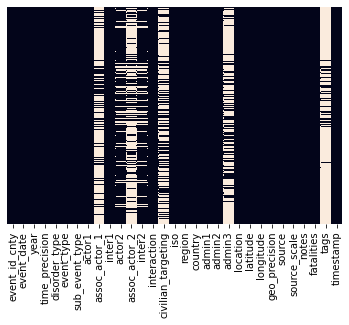

In [11]:
#Missing data
sns.heatmap(df_2.isnull(), yticklabels=False, cbar=False)

In [12]:
# Remove rows with null values
df_cleaned = df_2.dropna()

# Fill null values with a specific value (e.g., 0)
df_filled = df_2.fillna(0)

# Remove duplicate rows
df_no_duplicates = df_2.drop_duplicates()

print("\nDataFrame after dropping rows with null values:\n", df_cleaned)
print("\nDataFrame after filling null values with 0:\n", df_filled)
print("\nDataFrame after filling null values with the mean of column1:\n", df_2)
print("\nDataFrame after removing duplicate rows:\n", df_no_duplicates)

print("Null values in each column:\n", null_values)
print("\nNumber of duplicate rows:", duplicates)
print("\nMissing values in each column:\n", missing_values)


DataFrame after dropping rows with null values:
        event_id_cnty event_date  year  time_precision       disorder_type  \
20803        SSD9980 2024-06-25  2024               1  Political violence   
24790        SSD9926 2024-05-25  2024               1  Political violence   
27271        SSD9885 2024-05-07  2024               1  Political violence   
30023        SSD9837 2024-04-17  2024               1  Political violence   
30640        SSD9834 2024-04-12  2024               2  Political violence   
...              ...        ...   ...             ...                 ...   
222744       SSD6084 2019-01-01  2019               3  Political violence   
222745       SSD6083 2019-01-01  2019               3  Political violence   
226689       SSD6146 2018-11-02  2018               1  Political violence   
280866       SSD8106 2015-10-30  2015               2  Political violence   
310431       SSD5883 2014-01-22  2014               1  Political violence   

                        e

**4: Exploratory Data Analysis (EDA), Data visualization & Interpretation**

* Visualisation based actors, count of fatalities, and event type using filtered data for Sudan*

In [39]:
print("event county count:",df_2["admin1"].nunique())
print("event state count:",df_2["admin2"].nunique())
print("event type count:",df_2["event_type"].nunique())
print("event sub_event_type count:",df_2["sub_event_type"].nunique())

event county count: 97
event state count: 362
event type count: 6
event sub_event_type count: 24


In [40]:
event_type=df_2["event_type"].value_counts()
event_type

Battles                       10392
Violence against civilians     9143
Protests                       6208
Explosions/Remote violence     3760
Strategic developments         3051
Riots                           930
Name: event_type, dtype: int64

In [41]:
# Count the number of disorder_type by year aggregated by fatalities
disorder_count_by_year = sudan_data.groupby(['year', 'disorder_type'])['fatalities'].sum().reset_index()

print(disorder_count_by_year)

     year                       disorder_type  fatalities
0    1997                      Demonstrations           0
1    1997                  Political violence        3739
2    1997  Political violence; Demonstrations           0
3    1997              Strategic developments           0
4    1998                      Demonstrations           1
..    ...                                 ...         ...
98   2023              Strategic developments          12
99   2024                      Demonstrations           0
100  2024                  Political violence        7529
101  2024  Political violence; Demonstrations           1
102  2024              Strategic developments          12

[103 rows x 3 columns]


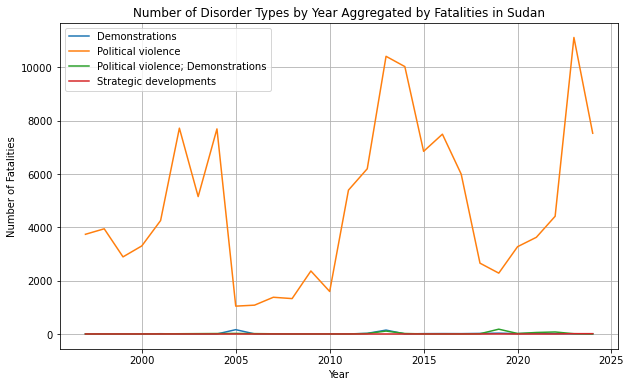

In [42]:
# Plot the data
plt.figure(figsize=(10,6))
for disorder in disorder_count_by_year['disorder_type'].unique():
    subset = disorder_count_by_year[disorder_count_by_year['disorder_type'] == disorder]
    plt.plot(subset['year'], subset['fatalities'], label=disorder)

plt.title('Number of Disorder Types by Year Aggregated by Fatalities in Sudan')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()

_There is intermittent trends of violent incidents in Sudan. The period between 2005 and 2010 had the lowest count of violent incidents._ 

_The second decade (2010-2020), and the third decade (2020 -Present) had the highest number of violent incidents._

In [43]:
import plotly.express as px

# Calculate the value counts of event types
event_type = df_2["event_type"].value_counts()

# Create a pie chart using Plotly
fig = px.pie(event_type, values=event_type.values, names=event_type.index, title='Total Type of Event percentage in Sudan')

# Show the plot
fig.show()

_The pie_chart shows the propportions of violent in Sudan by event percentage._

_Battles constitute the largest proportion of violence followed by violence againts civilians_

In [44]:
# event and sub_event 

sub_event=df_2.groupby(["event_type","sub_event_type"])["event_date"].agg({'count'}).reset_index()
sub_event

,event_type,sub_event_type,count
0,Battles,Armed clash,9708
1,Battles,Government regains territory,419
2,Battles,Non-state actor overtakes territory,265
3,Explosions/Remote violence,Air/drone strike,2478
4,Explosions/Remote violence,Chemical weapon,18
5,Explosions/Remote violence,Grenade,55
6,Explosions/Remote violence,Remote explosive/landmine/IED,264
7,Explosions/Remote violence,Shelling/artillery/missile attack,945
8,Protests,Excessive force against protesters,455
9,Protests,Peaceful protest,4851


_The most frequent type of violent event in Sudan are armed battles, followed by clash between civilians againts civilians. Explosions and chemical attacks are the least events recorded during the different period._

In [45]:
# Group by event_type and sub_event_type and count the occurrences
sub_event = df_2.groupby(["event_type", "sub_event_type"])["event_date"].agg({'count'}).reset_index()

# Create a sunburst chart using Plotly
fig = px.sunburst(sub_event, 
                  path=['event_type', 'sub_event_type'], 
                  values='count',
                  width=600, # Width of map
                  height=600)

fig.update_traces(textinfo="label+percent parent")
fig.layout.update(title="<b> Event type and Sub event type percentage in Sudan (ACLED)<b>",
                  titlefont={'color':None, 'size': 15, 'family': 'San-Serif'})

fig.show()

_From the sunburst chart the event_type is at the outer level and sub_event_type as the inner level._


_Each event_type slice is divided into smaller slices representing the sub_event_type within that event type._

_The size of each slice corresponds to the count of occurrences. Larger slices indicate higher counts._


_The percentage labels show the proportion of each sub_event_type within its parent event_type._


In [ ]:
#Summary of events by actor_type1
actor_type1=df_2["inter1"].value_counts()
actor_type1

NameError: name 'df_2' is not defined

In [50]:
# Creating the horizontal bar chart
actor_type1=df_2["inter1"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(df_2[x=counts, y=categories, edgecolor='black', orient='h'])

# Adding titles and labels
plt.title("Attacks by Actors in Sudan", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Categories", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotating bar values
for i, count in enumerate(counts):
    plt.text(count + 100, i, str(count), va='center', fontsize=10)

# Ensuring proper layout
plt.tight_layout()

plt.show()

SyntaxError: invalid syntax (<ipython-input-50-0fb8c094da51>, line 5)

In [26]:
actor_type2=df_2["inter2"].value_counts()
actor_type2

Civilians                12109
Rebel group               7765
State forces              4438
Identity militia          2431
Political militia          709
External/Other forces      372
Rioters                    184
Protesters                 102
Name: inter2, dtype: int64

In [51]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add pie charts to subplots
fig.add_trace(go.Pie(labels=actor_type1.index, values=actor_type1, name="Actor type1"), 1, 1)
fig.add_trace(go.Pie(labels=actor_type2.index, values=actor_type2, name="Actor type2"), 1, 2)

# Update traces to create donut-like pie charts
fig.update_traces(hole=.6, hoverinfo="label+percent+name")

# Update layout with title and annotations
fig.update_layout(
    title="<b> Actor type involved in Sudan conflict<b>",
    titlefont={'color':None, 'size': 20, 'family': 'San-Serif'},
    height=600,
    width=1000,
    annotations=[
        dict(text='<b>instigator', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='<b>victime/hit back', x=0.88, y=0.5, font_size=20, showarrow=False)
    ]
)

# Show the plot
fig.show()

**Based on the visualization of the instigators (Actor type1) involved in the Sudan conflict, several insights can be drawn:**

Dominant Actor Types:

The largest slices in the donut chart represent the most frequent instigators. Identifying these dominant actor types can help understand which groups or entities are most often initiating conflict.
Proportional Representation:

The percentage values provide a clear picture of how each actor type contributes to the overall number of incidents. This can highlight whether the conflict is driven by a few major players or a more diverse set of instigators.
Role in Conflict Dynamics:

Understanding the distribution of instigators can shed light on the dynamics of the conflict. For example, if a particular actor type is significantly more prevalent, it might indicate their central role in the conflict's escalation.
Trends Over Time:

If the data includes a time component, analyzing changes in the distribution of instigators over different periods can reveal trends. For instance, a rise or fall in the activity of certain actor types over time can indicate shifts in the conflict's nature.
Policy and Intervention Focus:

Identifying the key instigators can help policymakers and organizations focus their efforts on addressing the root causes of the conflict. Targeted interventions can be designed to mitigate the influence of the most frequent instigators.
Comparative Analysis:

Comparing the instigators with the victims or other actor types involved in the conflict can provide a more comprehensive understanding of the interactions and relationships between different groups.


**Analyzing the "victim/hit back" (Actor type2) data from the visualization can provide several valuable insights:**

Prevalent Victim Types:

The largest slices in the donut chart represent the most frequent victims or those who retaliate. Identifying these groups can help understand which entities are most often targeted in the conflict.
Proportional Impact:

The percentage values show the proportion of each victim type relative to the total number of incidents. This can highlight whether the conflict disproportionately affects certain groups.
Patterns of Retaliation:

If certain actor types frequently appear as both instigators and victims, it might indicate cycles of retaliation. Understanding these patterns can be crucial for breaking the cycle of violence.
Vulnerability and Resilience:

The distribution of victims can reveal which groups are most vulnerable in the conflict. Conversely, it can also show which groups are more likely to hit back, indicating their resilience or capacity for self-defense.
Humanitarian Needs:

Identifying the most affected victim groups can help humanitarian organizations prioritize their efforts. Resources can be directed to support the most vulnerable populations.
Conflict Dynamics:

Comparing the distribution of victims with that of instigators can provide a deeper understanding of the conflict dynamics. For example, if certain groups are both major instigators and victims, it might suggest internal conflicts within those groups.
Policy and Intervention Strategies:


In [28]:
# Convert the 'event_date' column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Extract the decade from the 'event_date' column
df['decade'] = (df['event_date'].dt.year // 10) * 10

# Group the data by decade and count the number of incidents
incidents_by_decade = df.groupby('decade').size().reset_index(name='number_of_incidents')

print(incidents_by_decade)

   decade  number_of_incidents
0    1990                12320
1    2000                36903
2    2010               151894
3    2020               196176


In [52]:
# Create a bar chart with increased bar width
plt.figure(figsize=(10, 6))
plt.bar(data['decade'], data['number_of_incidents'], color='skyblue', width=8)  # Increased bar width
plt.xlabel('Decade')
plt.ylabel('Number of Incidents')
plt.title('Number of Violent Incidents in Sudan by Decade')
plt.xticks(data['decade'])
plt.tight_layout()

# Save the plot as an image file
plt.savefig('incidents_by_decade.png')

# Show the plot
plt.show()

NameError: name 'data' is not defined

<Figure size 720x432 with 0 Axes>

Sudan has been in conflict for more than three decades. The number of incidents were lower during the first two decades and rose up in the last two decades 2010, and 2020.

In [30]:
#Analysing conflicts from 2004 to 2024
df_2=df_2[df_2["year"]>2003]

year_event = pd.crosstab(df_2.year,df.event_type).reset_index()

fig = px.bar(year_event, x="year", 
             y=["Protests","Riots","Violence against civilians","Battles","Strategic developments"],
             title=" <b> Political violence & protest events in Sudan (2010 - Dec 2024) <b>",
             labels={'value':'Number of Events','variable':'<b>Event Type'} ,
            width=1000, # Width of map
            height=600
            )
fig.update_layout(
    # barmode='group',  # comment this line to see stacked bar
    titlefont={'color':None, 'size': 15, 'family': 'San-Serif'},
    xaxis_tickangle=0,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

**5: Univariate  Analysis**

Number of violent incidents in Sudan have been on the rise since 2004!

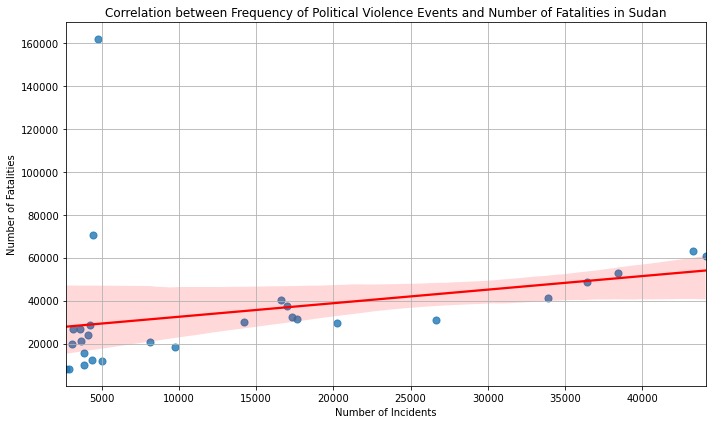

    year  fatalities  number_of_incidents
0   1997       26820                 3141
1   1998       70713                 4421
2   1999      161840                 4758
3   2000       23841                 4116
4   2001       26993                 3557
5   2002       28565                 4209
6   2003       21346                 3654
7   2004       19907                 3098
8   2005        8120                 2869
9   2006        8040                 2710
10  2007        9904                 3838
11  2008       11681                 5026
12  2009       15438                 3826
13  2010       12367                 4395
14  2011       20763                 8121
15  2012       18389                 9751
16  2013       30273                14219
17  2014       40354                16577
18  2015       37334                16998
19  2016       32180                17318
20  2017       31608                17655
21  2018       29391                20232
22  2019       31198              

In [55]:
# Convert the 'event_date' column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Extract the year from the 'event_date' column
df['year'] = df['event_date'].dt.year

# Group the data by year and sum the 'fatalities' and count the number of incidents
annual_data = df.groupby('year').agg({'fatalities': 'sum', 'event_date': 'count'}).reset_index()
annual_data.rename(columns={'event_date': 'number_of_incidents'}, inplace=True)

# Create a scatter plot with a regression line to investigate the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_incidents', y='fatalities', data=annual_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Fatalities')
plt.title('Correlation between Frequency of Political Violence Events and Number of Fatalities in Sudan')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('correlation_incidents_fatalities.png')

# Show the plot
plt.show()

# Display the DataFrame
print(annual_data)

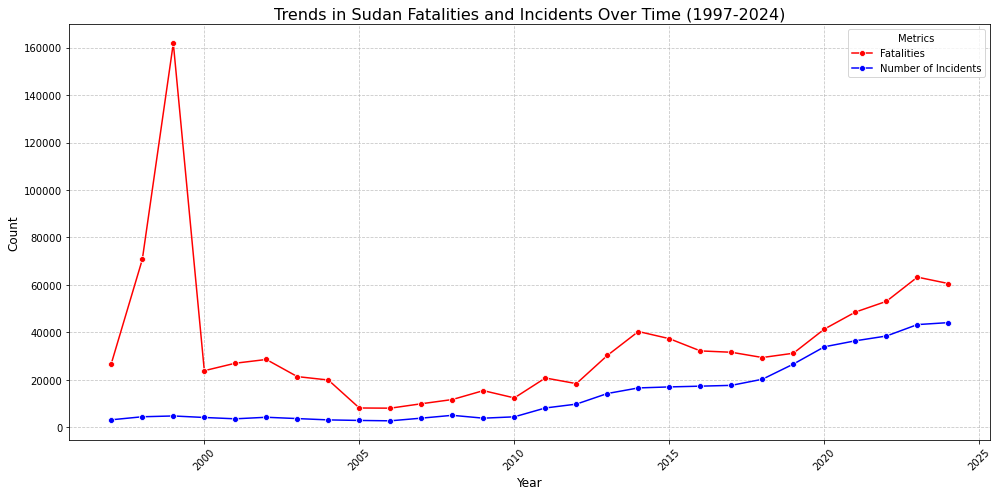

In [56]:
# Univariate Analysis: Line Plot for Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='fatalities', data=annual_data, label='Fatalities', marker='o', color='red')
sns.lineplot(x='year', y='number_of_incidents', data=annual_data, label='Number of Incidents', marker='o', color='blue')
plt.title("Trends in Sudan Fatalities and Incidents Over Time (1997-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

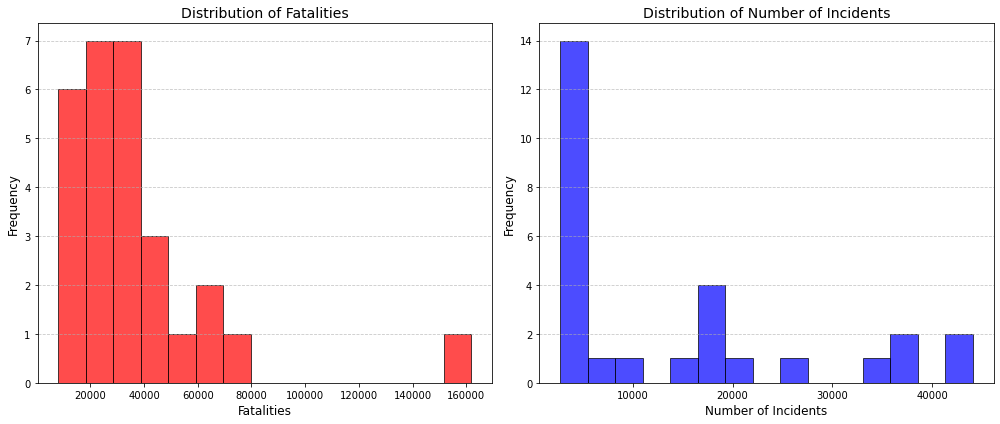

In [58]:
# Plot histograms for fatalities and number of incidents
plt.figure(figsize=(14, 6))

# Histogram for Fatalities
plt.subplot(1, 2, 1)
plt.hist(annual_data['fatalities'], bins=15, color='red', edgecolor='black', alpha=0.7)
plt.title("Distribution of Fatalities", fontsize=14)
plt.xlabel("Fatalities", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for Number of Incidents
plt.subplot(1, 2, 2)
plt.hist(annual_data['number_of_incidents'], bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Number of Incidents", fontsize=14)
plt.xlabel("Number of Incidents", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [67]:
# Create a new DataFrame with columns containing: fatalities, number_of_incidents
new_df = annual_data[['fatalities', 'number_of_incidents']].reset_index(drop=True)

# Display the new DataFrame
print(new_df)

    fatalities  number_of_incidents
0        26820                 3141
1        70713                 4421
2       161840                 4758
3        23841                 4116
4        26993                 3557
5        28565                 4209
6        21346                 3654
7        19907                 3098
8         8120                 2869
9         8040                 2710
10        9904                 3838
11       11681                 5026
12       15438                 3826
13       12367                 4395
14       20763                 8121
15       18389                 9751
16       30273                14219
17       40354                16577
18       37334                16998
19       32180                17318
20       31608                17655
21       29391                20232
22       31198                26628
23       41376                33911
24       48545                36440
25       53067                38451
26       63273              

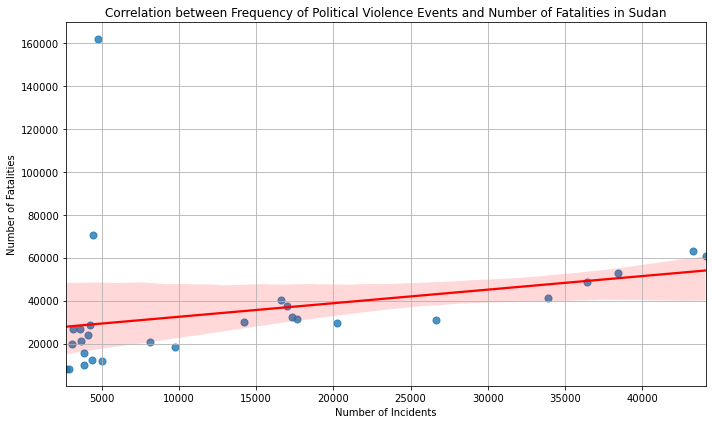

    fatalities  number_of_incidents
0        26820                 3141
1        70713                 4421
2       161840                 4758
3        23841                 4116
4        26993                 3557
5        28565                 4209
6        21346                 3654
7        19907                 3098
8         8120                 2869
9         8040                 2710
10        9904                 3838
11       11681                 5026
12       15438                 3826
13       12367                 4395
14       20763                 8121
15       18389                 9751
16       30273                14219
17       40354                16577
18       37334                16998
19       32180                17318
20       31608                17655
21       29391                20232
22       31198                26628
23       41376                33911
24       48545                36440
25       53067                38451
26       63273              

In [60]:
# Create a new DataFrame with columns containing: fatalities, number_of_incidents
new_df = annual_data[['fatalities', 'number_of_incidents']].reset_index(drop=True)

# Create a scatter plot with a regression line to investigate the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_incidents', y='fatalities', data=new_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Fatalities')
plt.title('Correlation between Frequency of Political Violence Events and Number of Fatalities in Sudan')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Display the DataFrame
print(new_df)



**5: Multivariate Analysis**

In [61]:
correlation = df_2.corr()
correlation

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
year,1.000000,-0.050513,0.052214,0.242973,0.284568,-0.112340,-0.135153,0.692977
time_precision,-0.050513,1.000000,-0.012884,-0.167011,-0.012207,0.144842,0.005543,-0.058306
iso,0.052214,-0.012884,1.000000,0.089017,0.037073,-0.040948,0.003055,0.028996
latitude,0.242973,-0.167011,0.089017,1.000000,0.044606,-0.233243,-0.061983,0.331674
longitude,0.284568,-0.012207,0.037073,0.044606,1.000000,-0.119295,-0.036191,0.365096
geo_precision,-0.112340,0.144842,-0.040948,-0.233243,-0.119295,1.000000,0.021321,-0.168756
fatalities,-0.135153,0.005543,0.003055,-0.061983,-0.036191,0.021321,1.000000,-0.058811
timestamp,0.692977,-0.058306,0.028996,0.331674,0.365096,-0.168756,-0.058811,1.000000


<AxesSubplot:>

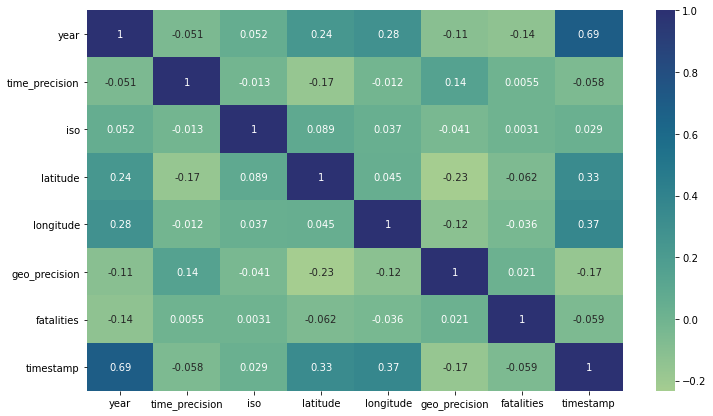

In [62]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

_There is almost a weak correlation between variables_.

_Only Iso and latitude have strong correlation_.

**6: Statistical modelling and forecasting**

In [81]:
#From annual data let's try to predict the future fatalities and number_of_incidents
annual_data

,year,fatalities,number_of_incidents
0,1997,26820,3141
1,1998,70713,4421
2,1999,161840,4758
3,2000,23841,4116
4,2001,26993,3557
5,2002,28565,4209
6,2003,21346,3654
7,2004,19907,3098
8,2005,8120,2869
9,2006,8040,2710


In [92]:
y = annual_data['fatalities']
x = annual_data['number_of_incidents']
x

0      3141
1      4421
2      4758
3      4116
4      3557
5      4209
6      3654
7      3098
8      2869
9      2710
10     3838
11     5026
12     3826
13     4395
14     8121
15     9751
16    14219
17    16577
18    16998
19    17318
20    17655
21    20232
22    26628
23    33911
24    36440
25    38451
26    43273
27    44101
Name: number_of_incidents, dtype: int64

<AxesSubplot:xlabel='fatalities', ylabel='Density'>

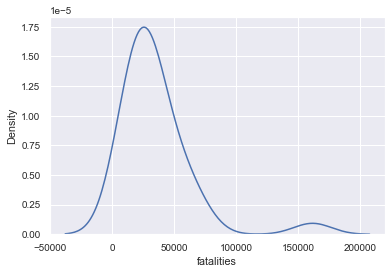

In [95]:
sns.kdeplot(x=annual_data["fatalities"])

<AxesSubplot:xlabel='number_of_incidents', ylabel='Density'>

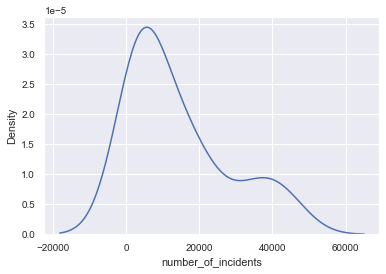

In [100]:
sns.kdeplot(x=annual_data["number_of_incidents"])

## Statsmodel test

In [103]:
import statsmodels.api as sm

y = annual_data['fatalities']
x = annual_data['number_of_incidents']

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             fatalities   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.336
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.138
Time:                        14:02:19   Log-Likelihood:                -326.61
No. Observations:                  28   AIC:                             657.2
Df Residuals:                      26   BIC:                             659.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.618e+04   8

_The model explains a small portion of the variance in fatalities and is not statistically significant._

_The coefficient for number_of_incidents is not significant, suggesting that it may not be a strong predictor of fatalities._

_Additionally, the diagnostics indicate potential issues with normality and autocorrelation in the residuals._

In [106]:
#Calculating error_based Metrics

from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(x))
mean_absolute_error(y, y_pred)

14103.855123759698